In [1]:
# lib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_nfx = pd.read_csv('../data/NFLX.csv')

In [3]:
df_nfx.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-11,633.200012,639.419983,626.780029,627.039978,627.039978,2862500
1,2021-10-12,633.020020,637.659973,621.989990,624.940002,624.940002,3227300
2,2021-10-13,632.179993,632.179993,622.099976,629.760010,629.760010,2420300
3,2021-10-14,632.229980,636.880005,626.789978,633.799988,633.799988,2671700
4,2021-10-15,638.000000,639.419983,625.159973,628.289978,628.289978,4116900


In [4]:
df_nfx.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
df_nfx.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df_nfx.shape

(252, 7)

In [ ]:
# hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
# hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [8]:
df_nfx.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,367.219723,373.217817,359.798849,366.351548,366.351548,9.012981e+06
std,178.632236,179.121200,176.538554,177.474089,177.474089,1.095273e+07
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.287200e+06
25%,219.030006,226.010002,211.610000,218.197502,218.197502,4.185975e+06
50%,349.000000,353.390000,340.335006,343.925003,343.925003,6.523800e+06
75%,545.567521,546.560013,533.570008,540.895020,540.895020,9.992575e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


### Visualization 

In [10]:
import mplfinance as mpf

In [14]:
df_nfx.set_index('Date').tail(100)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,186.720001,187.699997,176.270004,177.190002,177.190002,9665600
2022-05-19,178.050003,186.300003,175.710007,183.479996,183.479996,10448500
2022-05-20,185.869995,190.190002,179.770004,186.350006,186.350006,10429400
2022-05-23,186.149994,187.660004,177.889999,187.440002,187.440002,9602000
2022-05-24,182.000000,184.000000,177.169998,180.339996,180.339996,7706400
...,...,...,...,...,...,...
2022-10-04,244.839996,245.800003,233.250000,240.740005,240.740005,13925900
2022-10-05,238.759995,241.589996,227.380005,236.729996,236.729996,10825600
2022-10-06,236.679993,244.279999,233.910004,240.020004,240.020004,9188900


In [16]:
df_nfx.Date.dtype

dtype('O')

In [17]:
df_nfx['Date'] = pd.to_datetime(df_nfx['Date'])

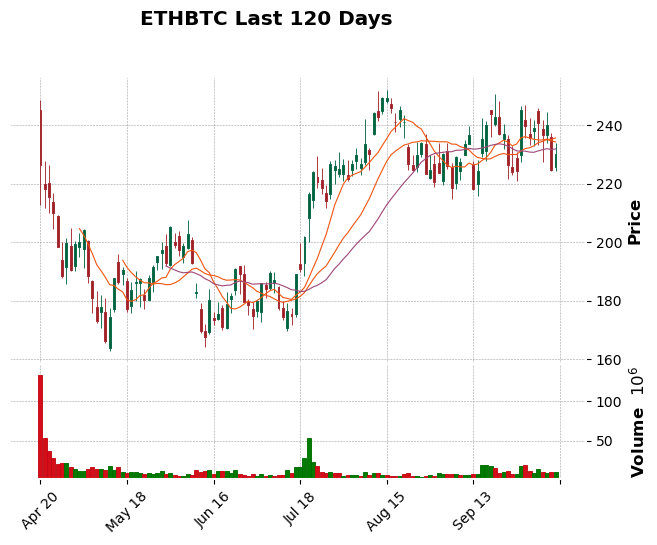

In [18]:
mpf.plot(df_nfx.set_index('Date').tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHBTC Last 120 Days', 
        mav=(10,20,30))